In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv (r'C:\Users\ADAM\Downloads\StudentsPerformance.csv')
df = pd.DataFrame(data, columns= ['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score','reading score','writing score'])
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


1. Find out how many males and females participated in the test.

No of Female who took the test: 518
No of Male who took the test: 482


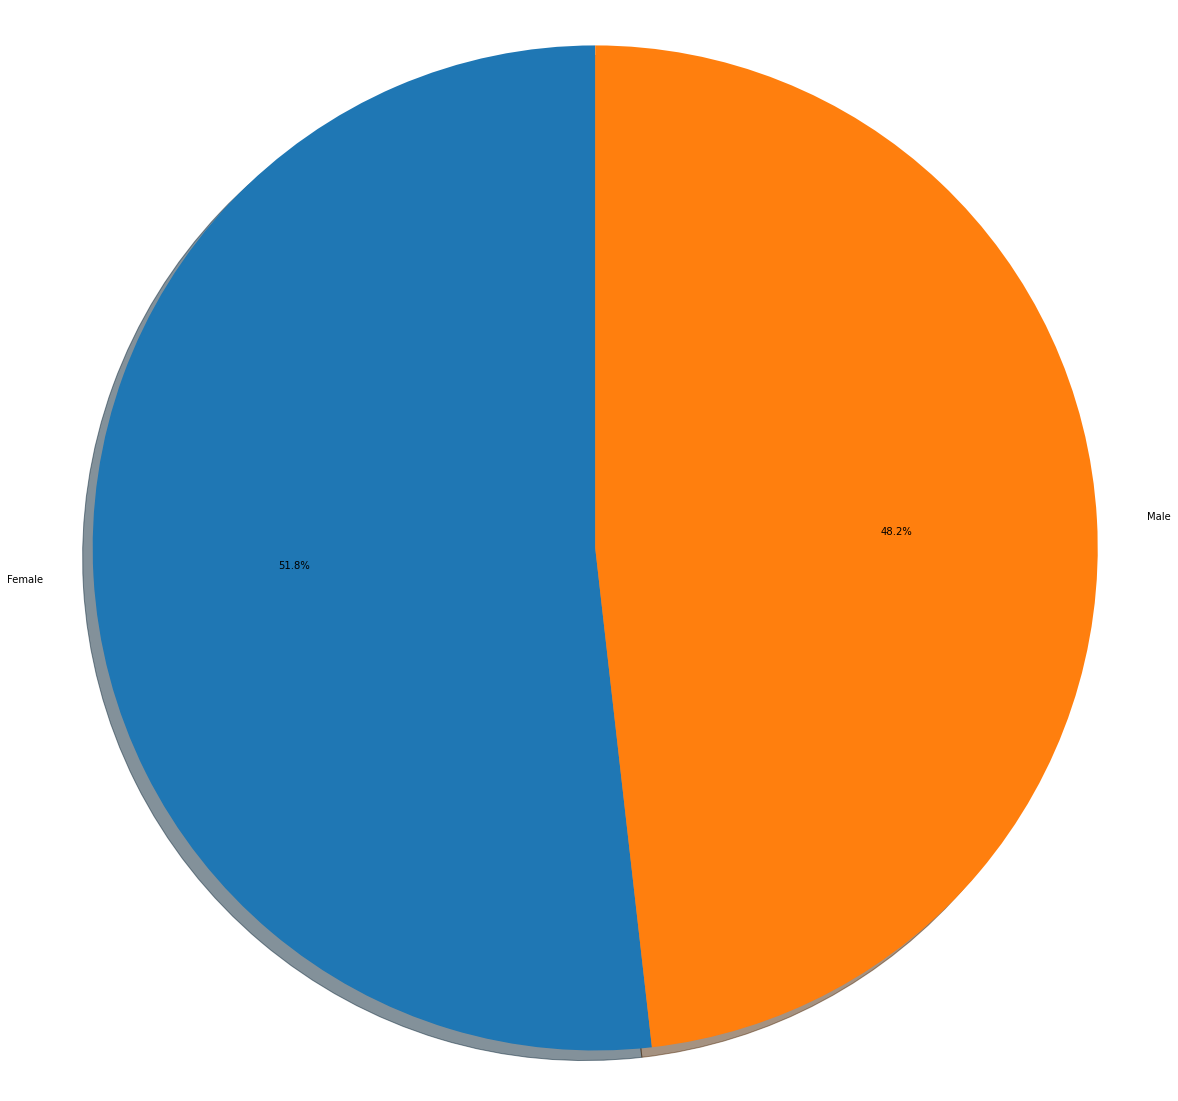

In [16]:
female=df[df['gender'] == 'female']
male=df[df['gender'] == 'male']
sizes = [len(female.index),len(male.index)]
print("No of Female who took the test:",len(female.index))
print("No of Male who took the test:",len(male.index))
plt.subplots()
plt.pie(sizes, labels=['Female','Male'], autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')

plt.show()

2. What do you think about the students' parental level of education?

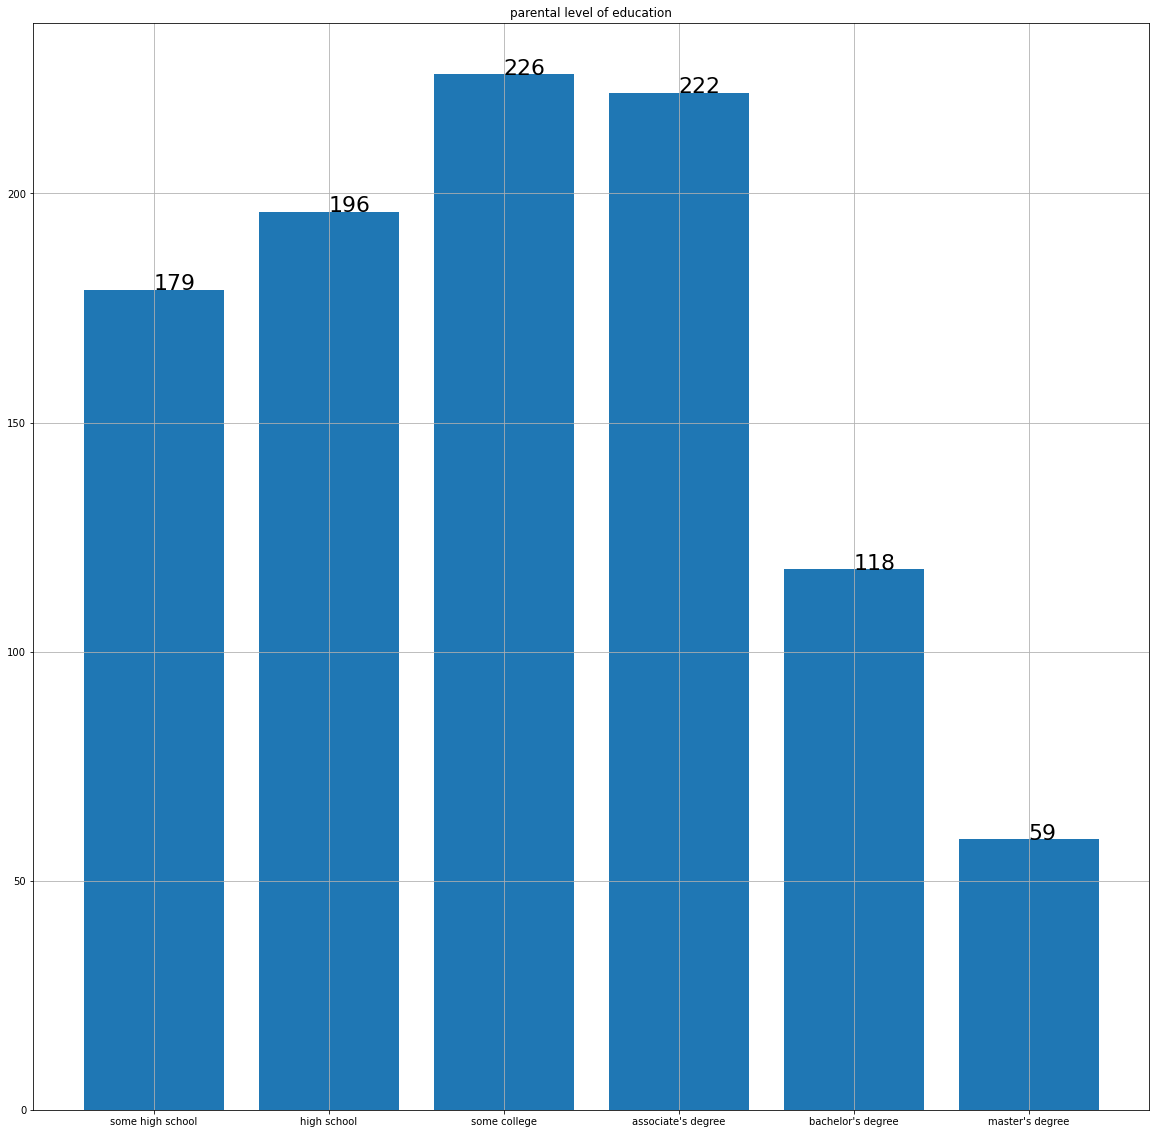

most count parental education level is some college = 226
highest parental education level is master's degree  count of 59


In [84]:
pedu_dict={}
for edu in df['parental level of education'].unique():
    count=df[df['parental level of education'] == edu]
    pedu_dict.update({edu:len(count.index)}) 

plt.figure()
plt.bar(pedu_dict.keys(),pedu_dict.values())
for edu in df['parental level of education'].unique():
    plt.text(edu,pedu_dict[edu],pedu_dict[edu], size=22)
plt.title('parental level of education')
plt.rcParams['figure.figsize'] = [20, 20]
plt.grid()
plt.show()
Keymax = max(zip(pedu_dict.values(), pedu_dict.keys()))[1]
print('most count parental education level is',Keymax,'=',pedu_dict[Keymax])
Keymin = min(zip(pedu_dict.values(), pedu_dict.keys()))[1]
print('highest parental education level is',Keymin,' count of',pedu_dict[Keymin])

3a. Who scores the most on average for math, reading and writing based on ● Gender

4a. What do you think about the scoring variation for math, reading and writing based on ● Gender

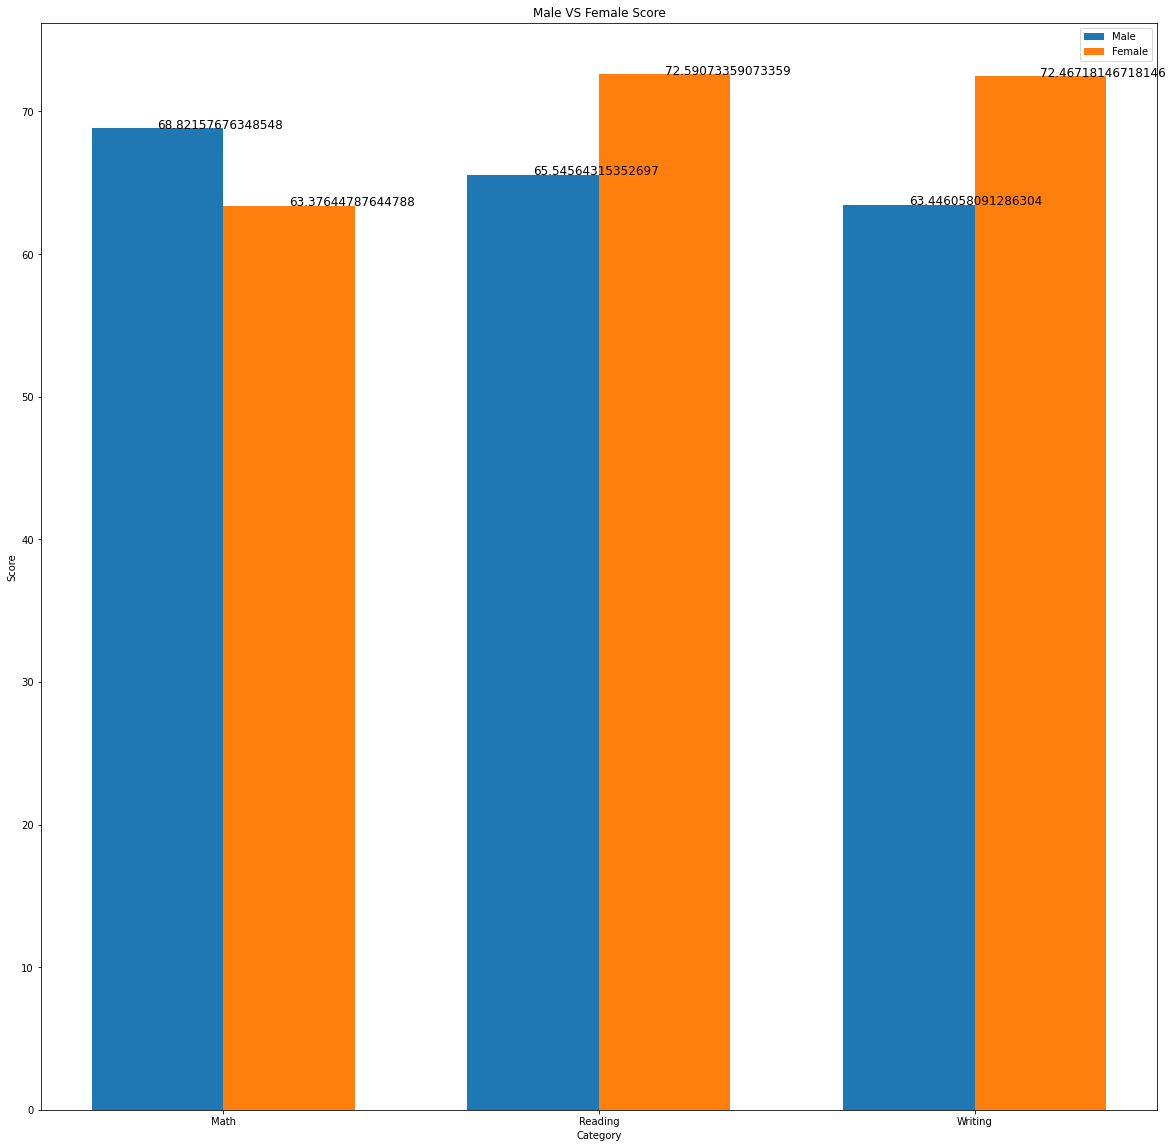

In  math  Male Participants score is greater
Score varation in  math = 5.445128887037605
In  reading  Female Participants score is greater
Score varation in  reading = 7.045090437206625
In  writing  Female Participants score is greater
Score varation in  writing = 9.021123375895158


In [74]:
male_avg={'math':male['math score'].mean(),
          'reading':male['reading score'].mean(),
          'writing':male['writing score'].mean()}
female_avg={'math':female['math score'].mean(),
            'reading':female['reading score'].mean(),
            'writing':female['writing score'].mean()}
index = np.arange(3)
bar_width = 0.35
fig, ax = plt.subplots()
plt.bar(index,male_avg.values(), bar_width,label="Male")
plt.bar(index+bar_width,female_avg.values(),bar_width, label="Female")
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Male VS Female Score')
plt.xticks(index + bar_width / 2)
ax.set_xticklabels(["Math", "Reading", "Writing"])
index=0
for edu in male_avg.keys():
    plt.text(index+bar_width,female_avg[edu],female_avg[edu], size=12)
    plt.text(index,male_avg[edu],male_avg[edu], size=12)
    index=index+1
plt.legend()
plt.show()
for i in male_avg.keys():
    if female_avg[i]>male_avg[i]:
        print('In ',i,' Female Participants score is greater')
        print('Score varation in ',i,'=',female_avg[i]-male_avg[i])
    elif  female_avg[i]<male_avg[i]:
        print('In ',i,' Male Participants score is greater')
        print('Score varation in ',i,'=',male_avg[i]-female_avg[i])

3b. Who scores the most on average for math, reading and writing based on ● Test preparation course.

4b. What do you think about the scoring variation for math, reading and writing based on ● Test preparation course

<Figure size 1440x1440 with 0 Axes>

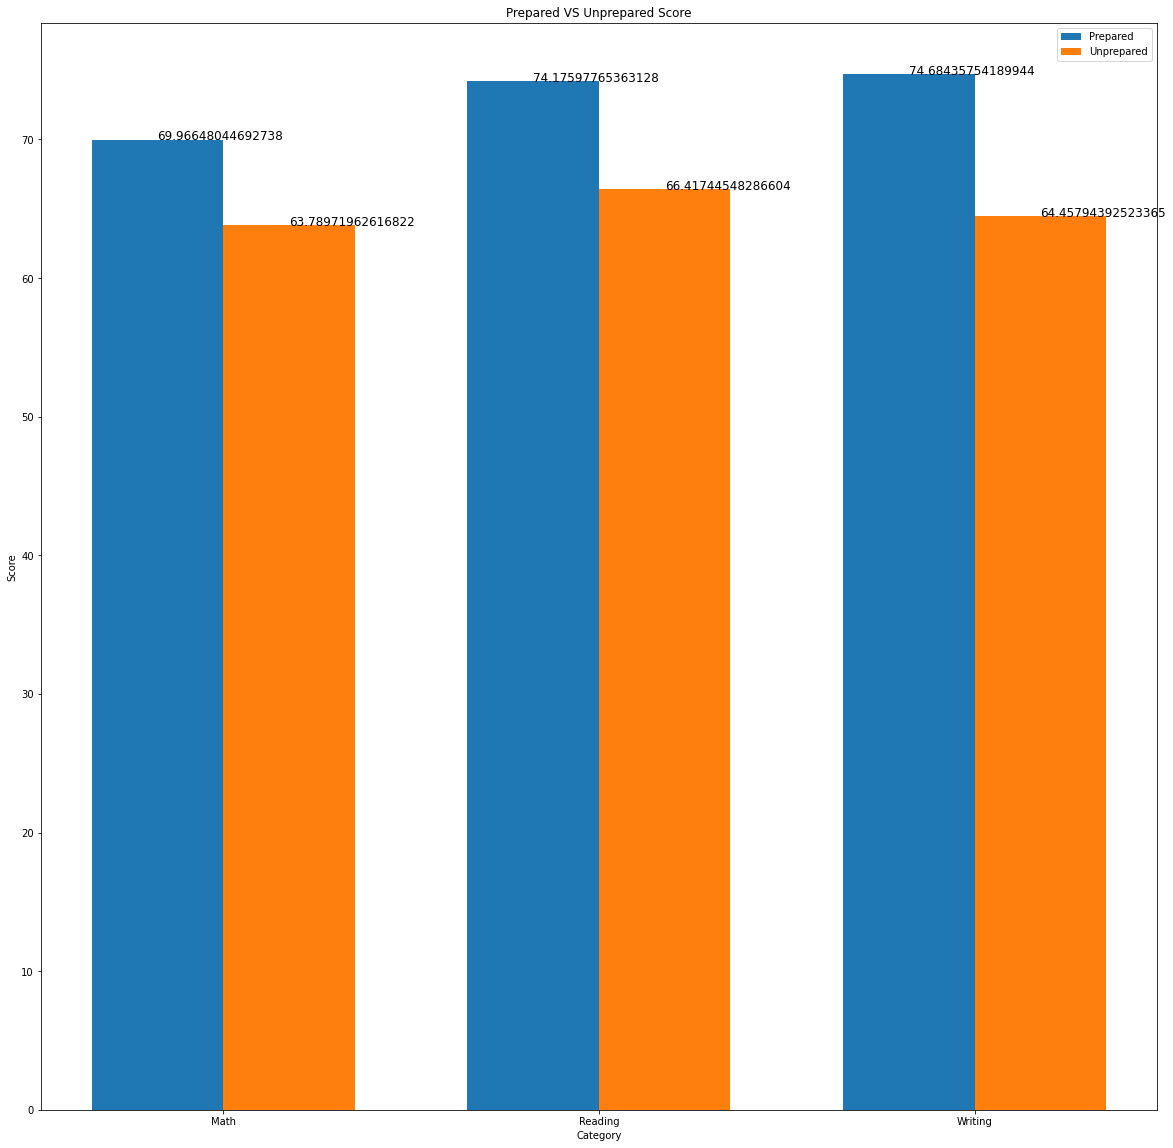

In  math  prepared score is greater
Score varation in  math = 6.1767608207591564
In  reading  prepared score is greater
Score varation in  reading = 7.7585321707652355
In  writing  prepared score is greater
Score varation in  writing = 10.226413616665795


In [73]:
prep=df[df['test preparation course'] == 'completed']
not_prep=df[df['test preparation course'] == 'none']
prep_avg={'math':prep['math score'].mean(),
          'reading':prep['reading score'].mean(),
          'writing':prep['writing score'].mean()}
not_prep_avg={'math':not_prep['math score'].mean(),
            'reading':not_prep['reading score'].mean(),
            'writing':not_prep['writing score'].mean()}
index = np.arange(3)
bar_width = 0.35
plt.figure()
fig, ax = plt.subplots()
plt.bar(index,prep_avg.values(), bar_width,label="Prepared")
plt.bar(index+bar_width,not_prep_avg.values(),bar_width, label="Unprepared")
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Prepared VS Unprepared Score')
plt.xticks(index + bar_width / 2)
ax.set_xticklabels(["Math", "Reading", "Writing"])
index=0
for edu in not_prep_avg.keys():
    plt.text(index+bar_width,not_prep_avg[edu],not_prep_avg[edu], size=12)
    plt.text(index,prep_avg[edu],prep_avg[edu], size=12)
    index=index+1
plt.legend()
plt.show()
for i in not_prep_avg.keys():
    if not_prep_avg[i]>prep_avg[i]:
        print('In ',i,' unprepared score is greater')
        print('Score varation in ',i,'=',not_prep_avg[i]-prep_avg[i])
    elif not_prep_avg[i]<prep_avg[i]:
        print('In ',i,' prepared score is greater')
        print('Score varation in ',i,'=',prep_avg[i]-not_prep_avg[i])

5. The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this.

In [79]:
dfa=df.sort_values(by=['math score'], ascending=False)
dfa=dfa.iloc[:int(len(dfa.index)/4)]
print('Top 25% of students based on their maths score')
dfa

Top 25% of students based on their maths score


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73
